# Advanced Spapros Tutorial: Probeset and reference selection and comparative evaluation

This tutorial shows how to select a gene probeset with spapros. Additionally, reference probesets are selected. Finally, all gene sets are evaluated and compared.

The used dataset contains 3k PBMCs from a healthy donor and is publicly available from
[10x Genomics](https://support.10xgenomics.com/single-cell-gene-expression/datasets/1.1.0/pbmc3k)
[here](http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz).
It is also available via scanpy [here](https://scanpy.readthedocs.io/en/stable/generated/scanpy.datasets.pbmc3k.html#scanpy.datasets.pbmc3k).

The dataset was preprocessed following the [scanpy pipeline](https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html).

The preprocessed Anndata consists of raw single cell RNAseq counts of 2000 genes for 2700 cells.

## Import packages and data

To run the notebook locally, create a conda environment using this [environment.yaml](TODO link):

    conda create -f environment.yaml

Then add the conda environment as ipython kernel:

    python -m ipykernel install --user --name spapros --display-name Python (spapros)



In [1]:
import spapros
from spapros import ProbesetSelector, pl, ProbesetEvaluator
from IPython.display import clear_output
import scanpy as sc
import pandas as pd
import os
import yaml

/big/st/strasserl/spapros/spapros/selection/selection_procedure.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
sc.settings.verbosity = 1
sc.logging.print_header()
print(f"spapros=={spapros.__version__}")

scanpy==1.8.1 anndata==0.7.8 umap==0.5.2 numpy==1.21.4 scipy==1.7.2 pandas==1.3.4 scikit-learn==1.0.1 statsmodels==0.13.1 python-igraph==0.9.8 pynndescent==0.5.5
spapros==0.1.0


In [3]:
# Load the dataset
adata = sc.read_h5ad("../data/small_data_raw_counts.h5ad")
sc.pp.log1p(adata)
adata


AnnData object with n_obs × n_vars = 2700 × 2000
    obs: 'n_genes', 'size_factors', 'leiden', 'celltype', 'tissue'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'quantile_0.85', 'quantile_0.9', 'quantile_0.95', 'quantile_0.99'
    uns: 'log1p'

## Start the selection

Here, we add several basic selection methods to create reference probe sets:
- pca
- hvg
- de
- random 

Thus, we will have 5 probsets in the end.

In [4]:
# create an instance of the ProbesetSelector class
selector = ProbesetSelector(adata, n=40, celltype_key = "celltype", reference_selections=["hvg", "random", "pca", "de"])

The following celltypes' test set sizes for forest training are below min_test_n (=20):
	 celltype_4 : 5
	 celltype_5 : 9
	 celltype_8 : 1


In [5]:
# invoke the central method
selector.select_probeset()


Select pca genes...
	 ...finished.
Select genes based on differential expression and forests as baseline for the final forests...
	 Select differentially expressed genes...
		 ...finished.
	 Train trees on DE selected genes as prior forest for the DE_baseline forest...


Train hierarchical trees:   0%|          | 0/3 [00:00<?, ?it/s]

/big/st/strasserl/spapros/spapros/evaluation/evaluation.py:1034: UserWarning: Zero cells of celltype celltype_8 in train or test set. No tree is calculated for celltype celltype_8.
  warnings.warn(f"Zero cells of celltype {c} in train or test set. No tree is calculated for celltype {c}.")
/big/st/strasserl/spapros/spapros/evaluation/evaluation.py:1036: UserWarning: Zero cells of celltype celltype_8 in train or test set. Celltype celltype_8 is not included as reference celltype.
  warnings.warn(


Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

	 Train DE_baseline forest by iteratively selecting specific differentially expressed genes for celltypes that are hard to distinguish...
Add DE genes with specific reference groups to improve tree performance...
  Iteration step 1:
	 Select DE genes...
	 Train decision trees on celltypes:
		 ['celltype_1', 'celltype_2', 'celltype_3', 'celltype_6']


Train hierarchical trees:   0%|          | 0/3 [00:00<?, ?it/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

		 Training finished.
  Iteration step 2:
	 Select DE genes...
	 Train decision trees on celltypes:
		 ['celltype_1', 'celltype_3', 'celltype_6']


Train hierarchical trees:   0%|          | 0/3 [00:00<?, ?it/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

		 Training finished.
  Iteration step 3:
	 Select DE genes...
	 Train decision trees on celltypes:
		 ['celltype_1', 'celltype_3', 'celltype_6']


Train hierarchical trees:   0%|          | 0/3 [00:00<?, ?it/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

		 Training finished.
Train final trees on all celltypes, now with the added genes...


Train hierarchical trees:   0%|          | 0/3 [00:00<?, ?it/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

	 Finished...
Train final forests by adding genes from the DE_baseline forest for celltypes with low performance...
	 Train forest on pre/prior/pca selected genes...


Train hierarchical trees:   0%|          | 0/3 [00:00<?, ?it/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

	 Iteratively add genes from DE_baseline_forest...
Adding genes from reference tree...
Train final trees on all celltypes, now with the added genes...


Train hierarchical trees:   0%|          | 0/3 [00:00<?, ?it/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

	 Finished...
Select ref_selection_hvg genes...
	 ...finished.
Select ref_selection_random genes...
	 ...finished.
Select ref_selection_pca genes...
	 ...finished.
Select ref_selection_de genes...
	 ...finished.


The selected probeset can be examined like this: 

In [12]:
selected_probesets = selector.probeset[["selection", "ref_selection_random", "ref_selection_hvg", "ref_selection_de", "ref_selection_pca"]]
selected_probesets

,selection,ref_selection_random,ref_selection_de,ref_selection_pca
PF4,True,False,True,False
CD79A,True,False,True,False
NKG7,True,False,True,True
LST1,True,False,True,True
LTB,True,False,True,True
...,...,...,...,...
RP11-285J16.1,False,False,False,False
RP5-1112D6.8,False,False,False,False
AC123023.1,False,False,False,False
YEATS2-AS1,False,False,False,False


## Vizualize the results

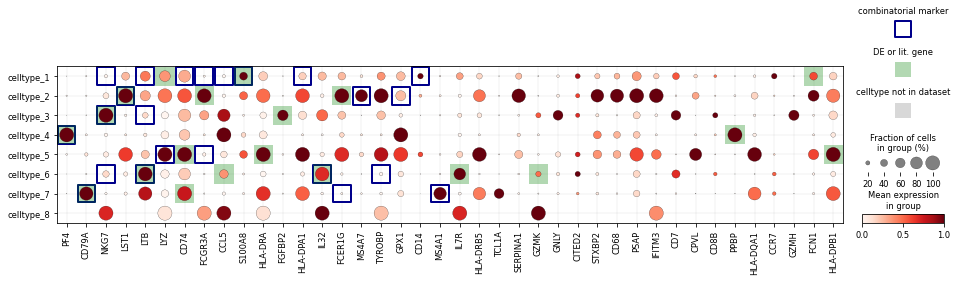

In [7]:
pl.masked_dotplot(adata, selector)

## Evaluate the results

In [8]:
param_yaml = "../data/parameters.yml"
with open(param_yaml, "r") as file:
    custom_params = yaml.load(file, Loader=yaml.FullLoader)
custom_params

{'data': {'name': 'small_data',
  'process_adata': ['norm', 'log1p'],
  'celltype_key': 'celltype'},
 'metrics': {'cluster_similarity': {'ns': [5, 21],
   'AUC_borders': [[7, 14], [15, 20]]},
  'knn_overlap': {'ks': [5, 10, 15, 20, 25, 30]},
  'forest_clfs': {'ct_key': 'celltype', 'threshold': 0.8},
  'marker_corr': {'per_celltype': True,
   'per_marker': True,
   'per_celltype_min_mean': None,
   'per_marker_min_mean': 0.025},
  'gene_corr': {'threshold': 0.8}}}

In [9]:
evaluator = ProbesetEvaluator(adata, metrics_params=custom_params)

In [10]:
selected_probesets.sum()

selection               40
ref_selection_random    40
ref_selection_hvg        0
ref_selection_de        40
ref_selection_pca       40
dtype: int64

In [13]:
for probeset in selected_probesets: 
    print(probeset)
    gene_list = selected_probesets.index[selected_probesets[probeset]].to_list()
    print(gene_list)
    evaluator.evaluate_probeset(gene_list, set_id=probeset)
    clear_output(wait=True)

ref_selection_pca
['NKG7', 'LST1', 'LTB', 'LYZ', 'CD74', 'FCGR3A', 'CCL5', 'S100A8', 'HLA-DRA', 'IL32', 'FCER1G', 'TYROBP', 'GPX1', 'IL7R', 'GZMK', 'GNLY', 'PSAP', 'CD7', 'CD8B', 'GZMH', 'FCN1', 'HLA-DPB1', 'SAT1', 'CCL3', 'S100A9', 'HLA-DRB1', 'COTL1', 'AIF1', 'ISG15', 'LGALS2', 'ID2', 'IFI6', 'CST3', 'GSTP1', 'CD79B', 'S100A11', 'GZMB', 'LGALS1', 'CTSS', 'MT2A']


The following cell types are not included in forest classifications since they have fewer 
than 40 cells: ['celltype_5', 'celltype_4', 'celltype_8']

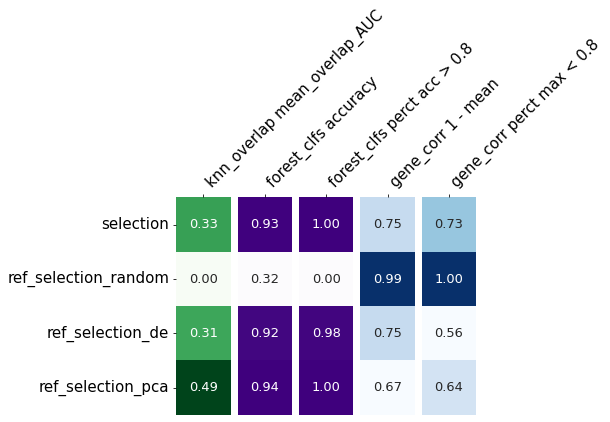

In [14]:
evaluator.plot_summary()